In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [141]:
#from the folder structmanResults, take all .tsv files and concatenate them into one dataframe.
dataPath = 'structmanResults/Ovulgaris/'
allFiles = glob.glob(dataPath + "/*.tsv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, sep='\t')
    list_.append(df)
frame = pd.concat(list_)


In [142]:
df = pd.read_csv('structmanResults/Ovulgaris_randomised.classification.tsv', index_col=None, header=0, sep='\t')

In [146]:
df2 = pd.read_csv('structmanResults/smlf_Ovulgaris_clean.classification.tsv', index_col=None, header=0, sep='\t')

In [143]:
df.shape

(708611, 28)

In [144]:
frame.shape

(948740, 28)

In [147]:
df2.shape

(13386, 28)

In [148]:
#create a new dataframe with only the columns we want to compare

compare_df = df[['Primary Protein ID', 'Amino Acid', 'Position', 'Simple Class', 'RIN Simple Class']]
compare_df2 = frame[['Primary Protein ID', 'Amino Acid', 'Position', 'Simple Class', 'RIN Simple Class']]

In [149]:
#print the fraction of a number of lines where simple class and RIN simple class have - as a value, divided by the total number of lines

print((compare_df[(compare_df['Simple Class'] == '-') | (compare_df['RIN Simple Class'] == '-')].shape[0]) / compare_df.shape[0])

0.36556022980168246


In [150]:
print((compare_df2[(compare_df2['Simple Class'] == '-') | (compare_df2['RIN Simple Class'] == '-')].shape[0]) / compare_df2.shape[0])

0.3795233678352341


In [151]:
#if there is '-' in Simple Class or RIN Simple Class, drop the row

compare_df = compare_df[(compare_df['Simple Class'] != '-') & (compare_df['RIN Simple Class'] != '-')]
compare_df2 = compare_df2[(compare_df2['Simple Class'] != '-') & (compare_df2['RIN Simple Class'] != '-')]

In [152]:
compare_df.shape

(449571, 5)

In [153]:
compare_df2.shape

(588671, 5)

In [9]:
compare_df['RIN Simple Class'].unique()

array(['Surface', 'Buried', 'ligand interaction', 'Core',
       'Protein interaction', 'Disorder', 'ion interaction',
       'Peptide interaction', 'DNA interaction', 'RNA interaction',
       'metal interaction'], dtype=object)

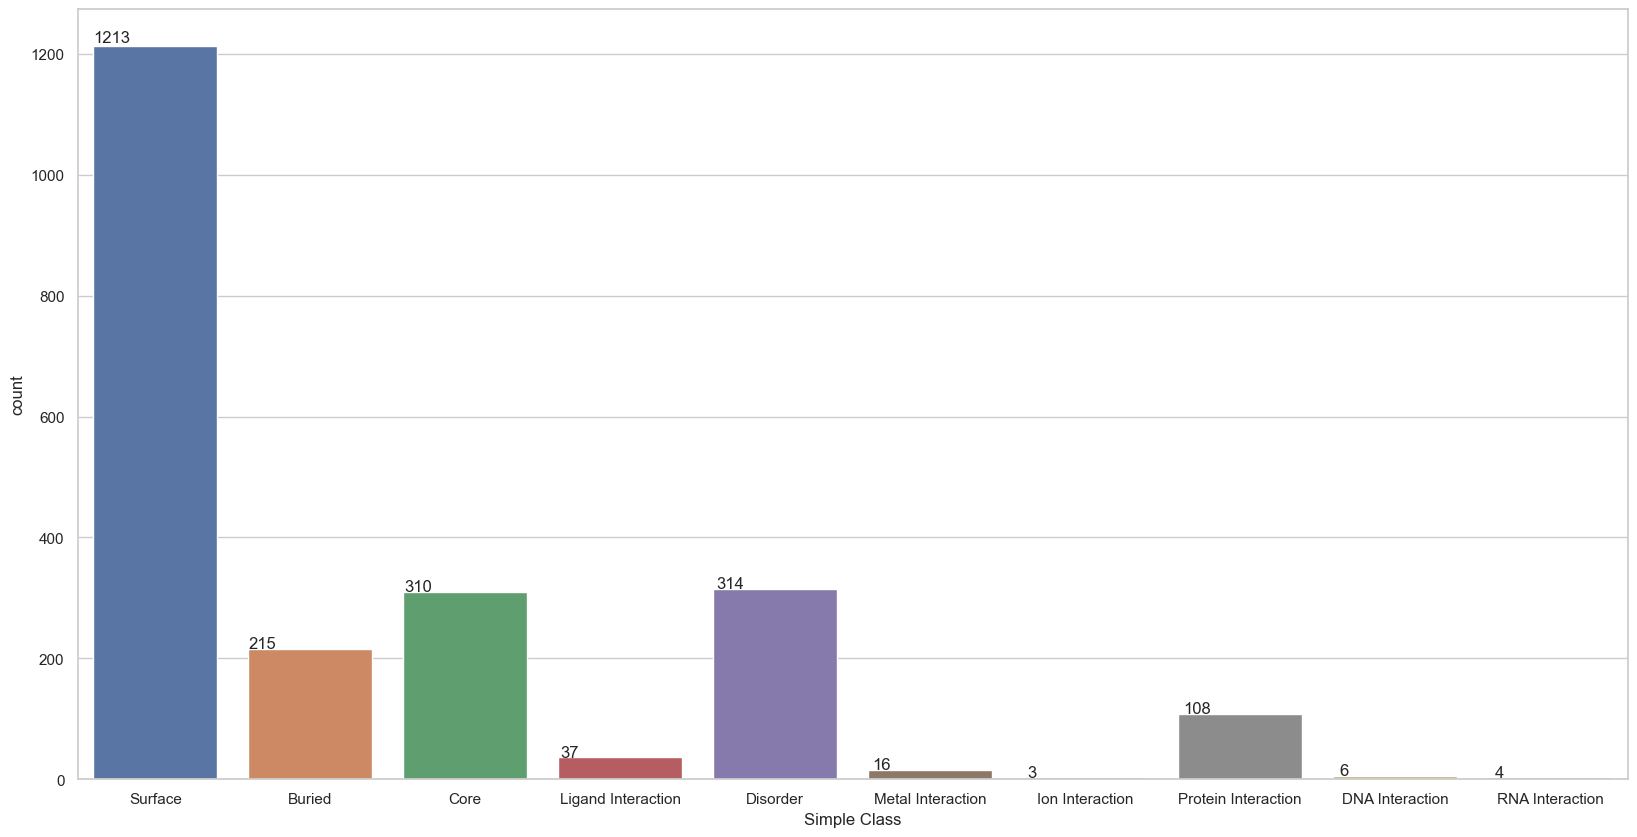

In [37]:
#create a seaborn barplot for the column Simple Class. Take only these rows, where the Primary Protein ID doesn't have underscores in it. These are the rows with editing sites locations.
#make the plot wider so that the labels are readable. The y axis should be the fraction of the total number of rows where the primary protein ID doesn't have underscores in it.

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="Simple Class", data=compare_df[compare_df['Primary Protein ID'].str.contains('_') == False])
#put counts on top of the bars, int, not float
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
#save the plot as a png file
#plt.savefig('Obim_simpleClassCountMut_randomised.png')

/var/folders/lf/s1jn10250m5gyqc358vw8z3c0000gn/T/ipykernel_9202/3797072244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df1_filtered['Dataset'] = 'O.vulgaris randomised editing sites'
/var/folders/lf/s1jn10250m5gyqc358vw8z3c0000gn/T/ipykernel_9202/3797072244.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df2_filtered['Dataset'] = 'O.vulgaris editing sites'


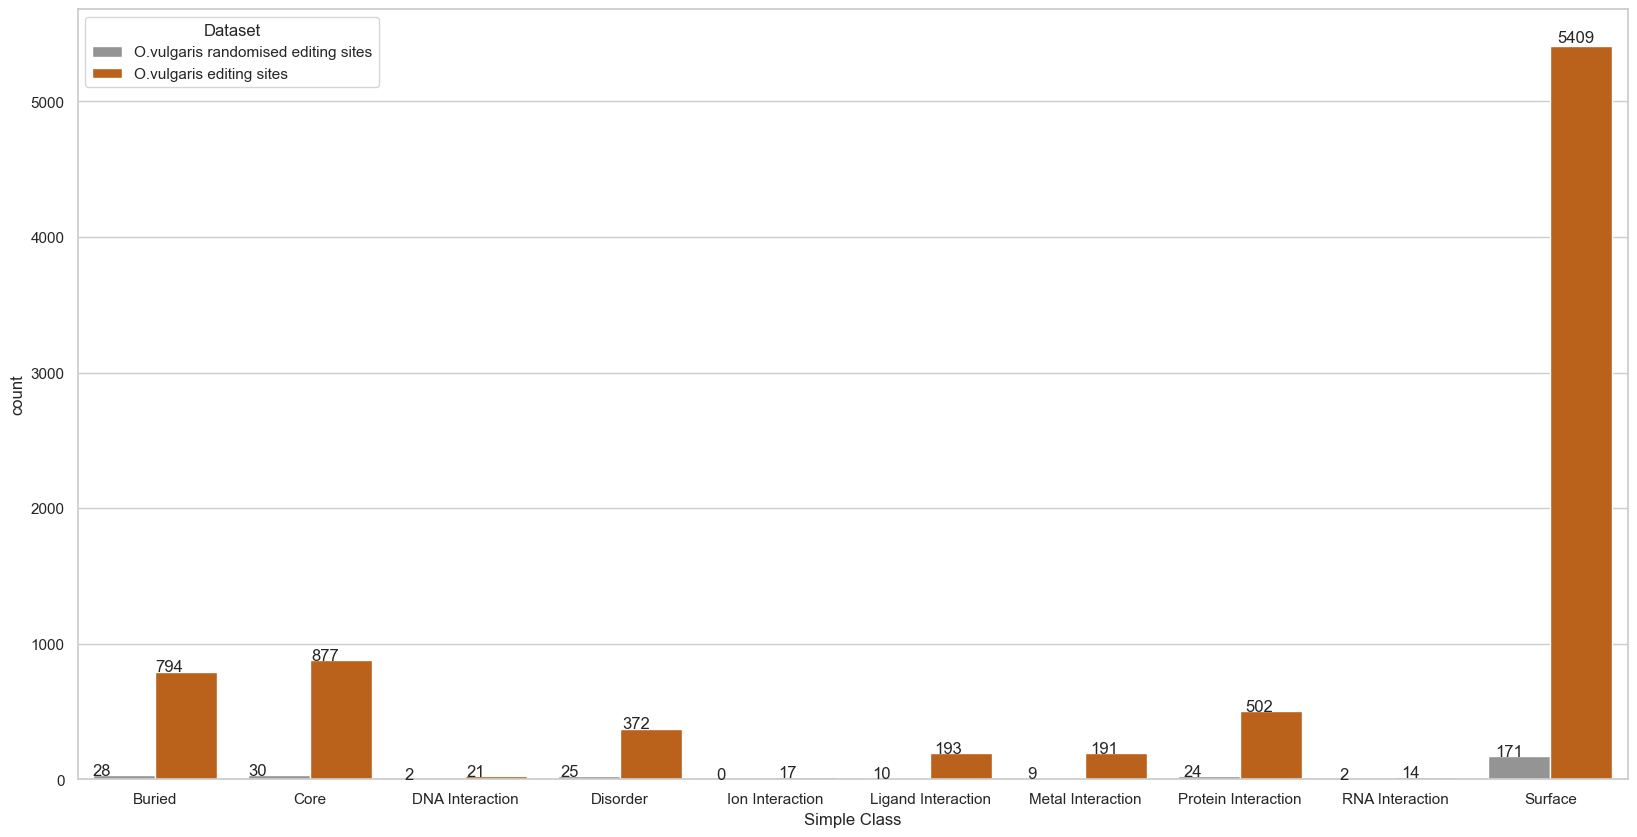

In [158]:
# filter the dataframes
from scipy.stats import chi2_contingency

compare_df1_filtered = compare_df[compare_df['Primary Protein ID'].str.contains('_') == False]
compare_df2_filtered = compare_df2[compare_df2['Primary Protein ID'].str.contains('_') == False]

# create new column 'source' in each dataframe to identify the source after concatenation
compare_df1_filtered['Dataset'] = 'O.vulgaris randomised editing sites'
compare_df2_filtered['Dataset'] = 'O.vulgaris editing sites'

# concatenate the dataframes
compare_df_combined = pd.concat([compare_df1_filtered, compare_df2_filtered])

# create the plot
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

# you might want to sort the 'Simple Class' category for better visualization
compare_df_combined['Simple Class'] = pd.Categorical(compare_df_combined['Simple Class'], categories=sorted(compare_df_combined['Simple Class'].unique()), ordered=True)

# plot side by side
ax = sns.countplot(x='Simple Class', hue='Dataset', data=compare_df_combined, palette=[sns.color_palette("colorblind")[7], sns.color_palette("colorblind")[3]])

# add annotations
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
    
#plt.show()
plt.savefig('Ovul_simpleClassCountMut_comparison.png')

In [159]:
from scipy.stats import chi2_contingency

# create contingency table
# Define the categories of interest
categories_of_interest = ["Protein Interaction", "Metal Interaction", "Ligand Interaction"]

# create contingency table only for categories of interest
contingency = pd.crosstab(df[df['Simple Class'].isin(categories_of_interest)]['Simple Class'],
                          df2[df2['Simple Class'].isin(categories_of_interest)]['Simple Class'])

# conduct chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency)


print(f"chi2 statistic: {chi2}")
print(f"p-value: {p_val}")

chi2 statistic: 19.949266419854656
p-value: 0.0005110481873890268


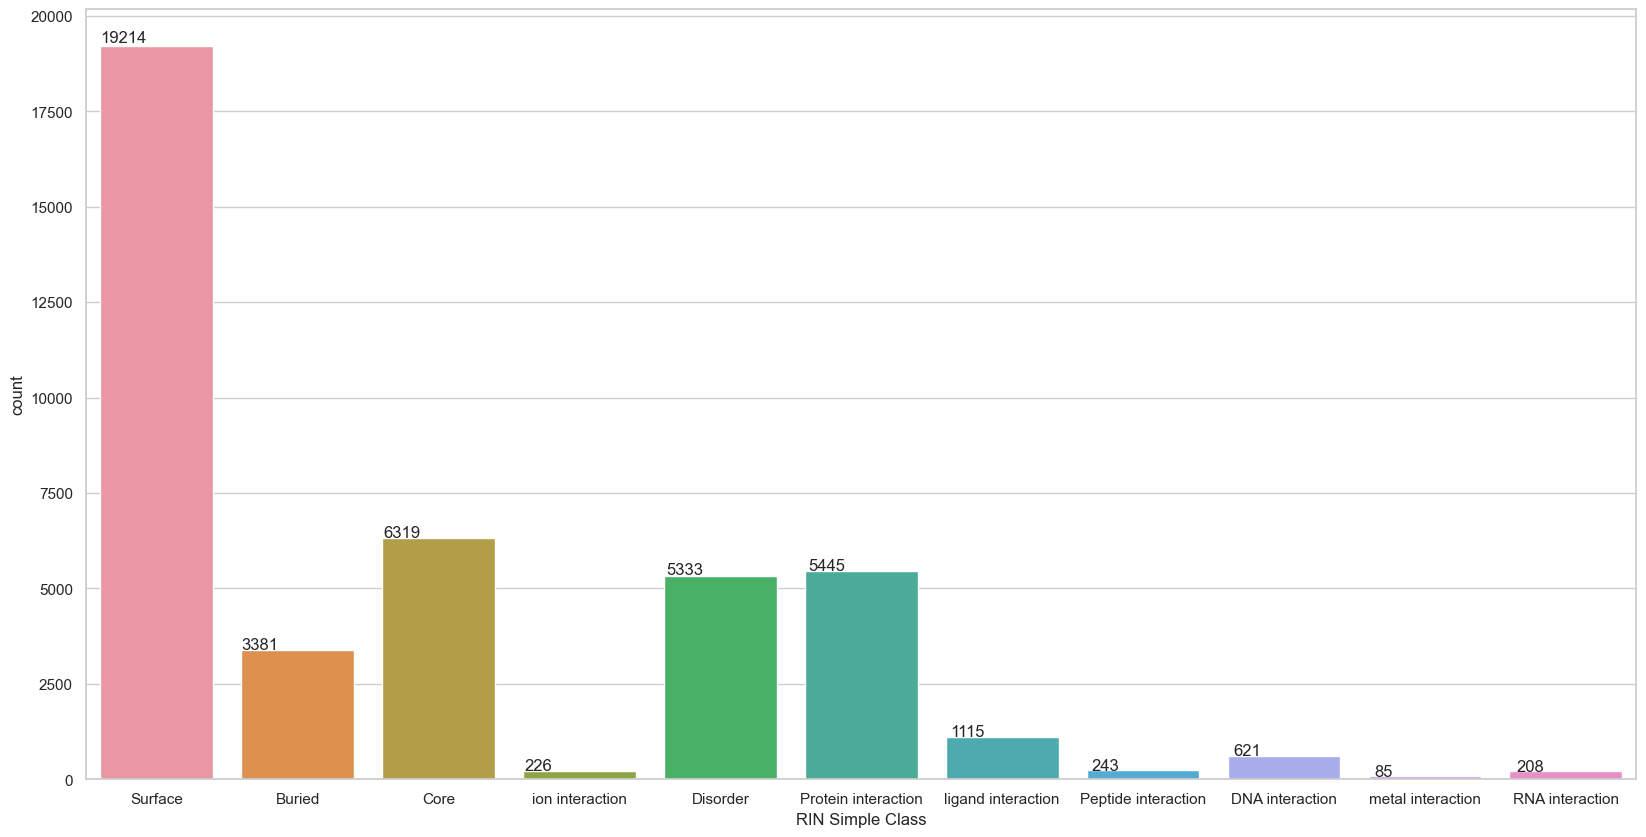

In [36]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="RIN Simple Class", data=compare_df2[compare_df2['Primary Protein ID'].str.contains('_') == False])
#put counts on top of the bars, int, not float
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

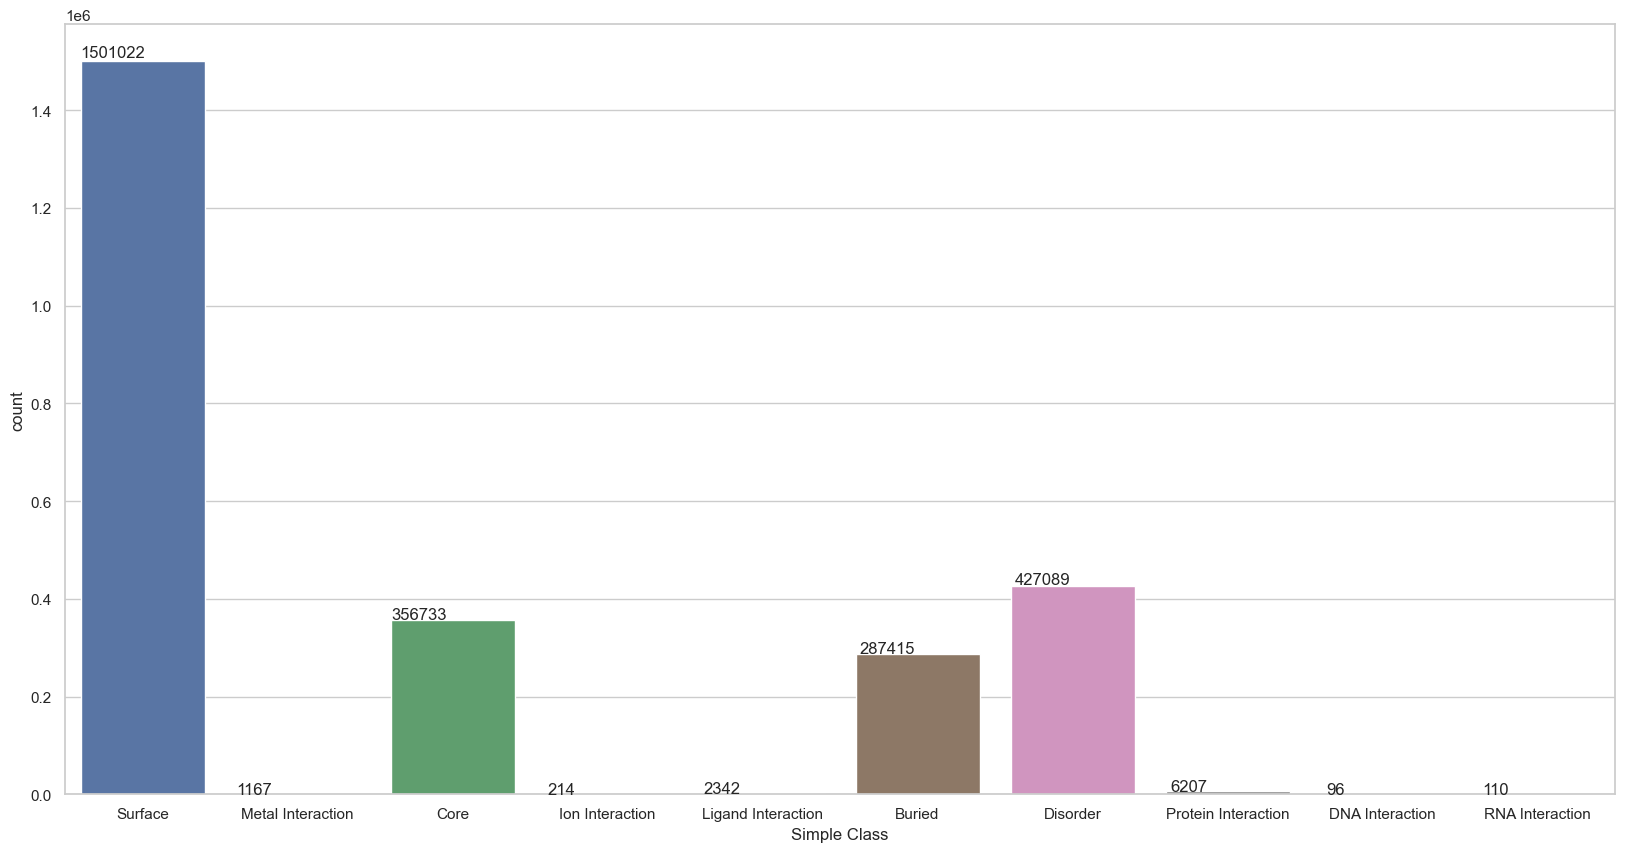

In [10]:
#the bars for the plot should go in the following order: 'Protein Interaction', 'Surface', 'Core', 'Buried', '-','Metal Interaction', 'Disorder', 'DNA Interaction', 'Ligand Interaction', 'Ion Interaction', 'RNA Interaction'
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="Simple Class", data=compare_df[compare_df['Primary Protein ID'].str.contains('_') == True], order=['Surface', 'Metal Interaction', 'Core', 'Ion Interaction', 'Ligand Interaction', 'Buried', 'Disorder', 'Protein Interaction',  'DNA Interaction', 'RNA Interaction'])
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
#plt.savefig('OBim_simpleClassCount_randomised.png')

[Text(0.5, 0, 'Simple Class (Editing site)'),
 Text(0, 0.5, 'Percentage of total')]

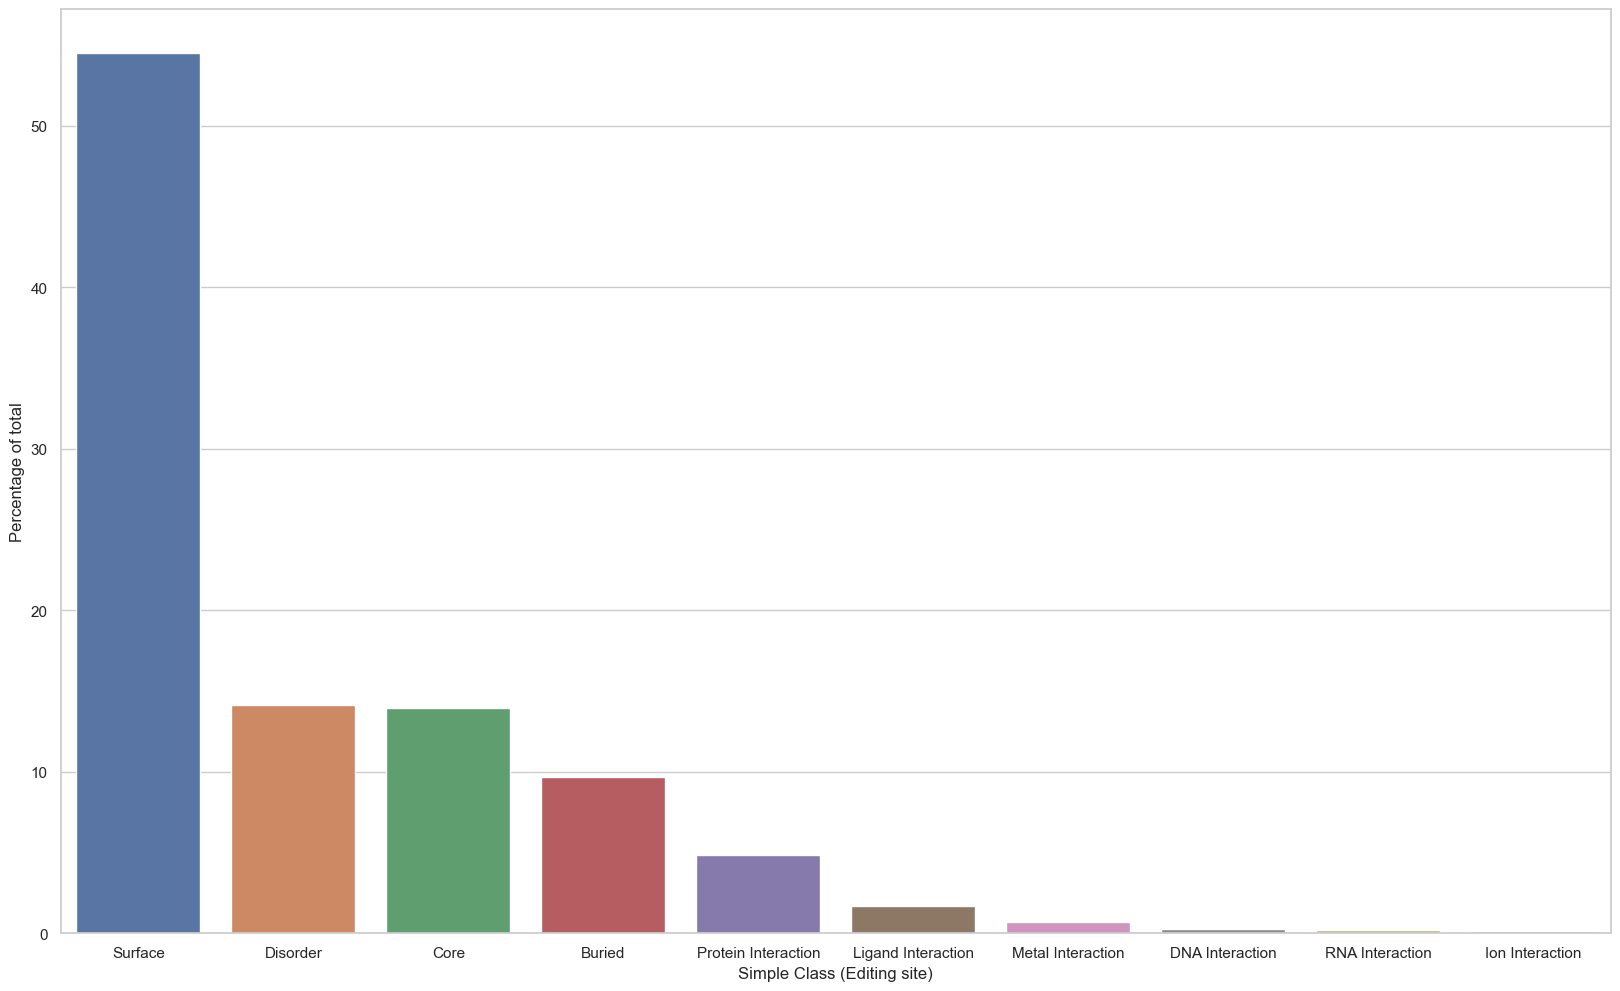

In [34]:
# Calculate the percentage of each value
total_count = len(compare_df[compare_df['Primary Protein ID'].str.contains('_') == False])
count_data = compare_df[compare_df['Primary Protein ID'].str.contains('_') == False]['Simple Class'].value_counts()
percent_data = (count_data / total_count) * 100

# Create the plot
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
ax = sns.barplot(x=percent_data.index, y=percent_data.values)

# Add labels
ax.set(xlabel='Simple Class (Editing site)', ylabel='Percentage of total')
#plt.show()
#plt.ylim(0,60)

#plt.savefig('Obim_simpleClassPercentMut_randomised.png')

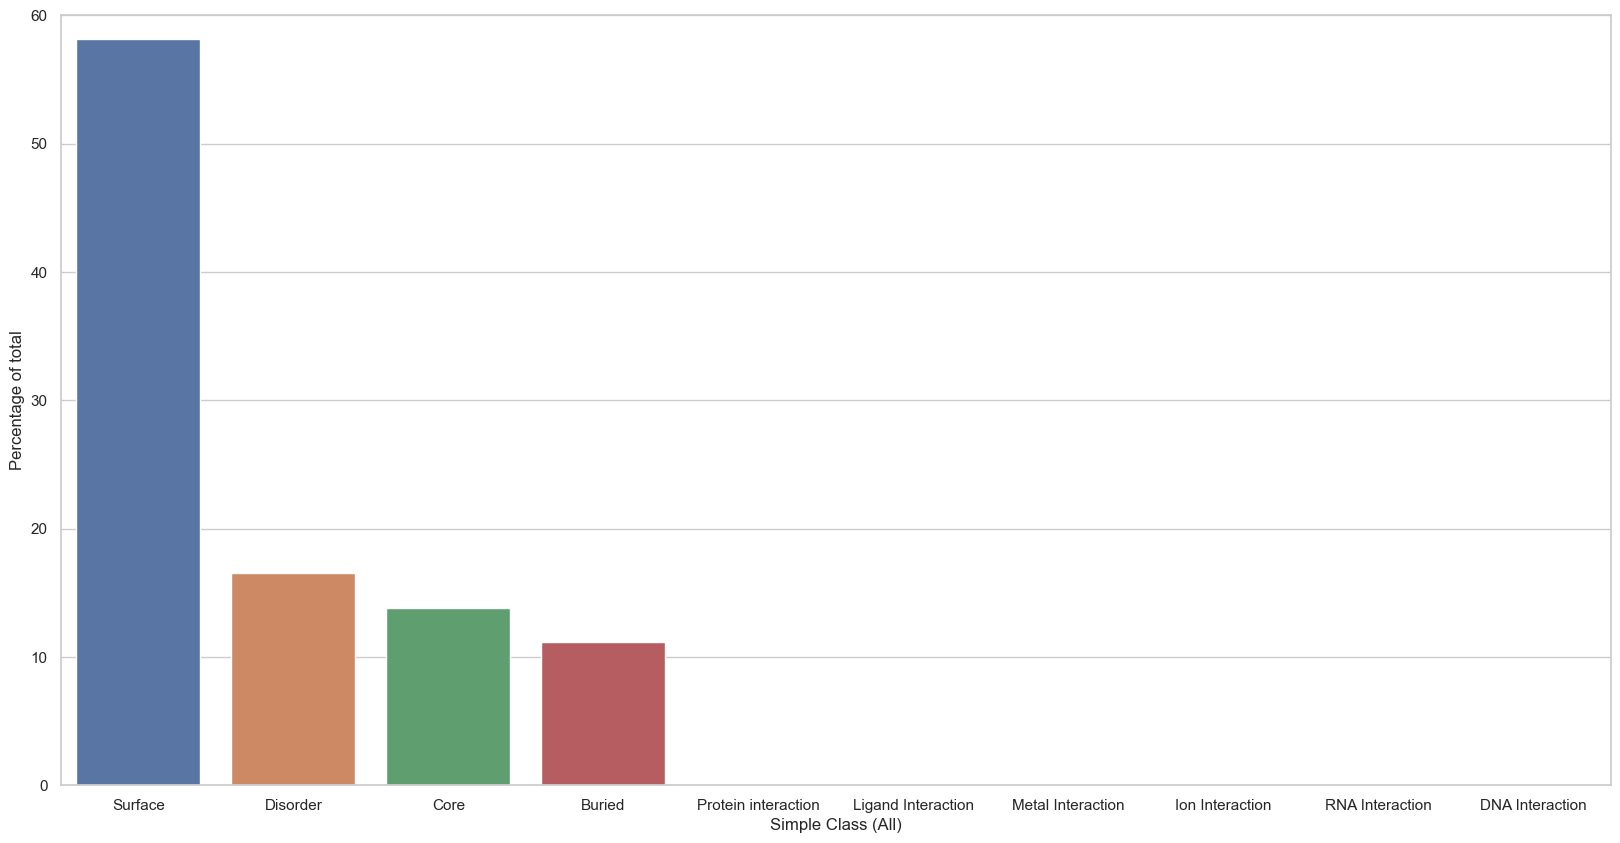

In [12]:
# Calculate the percentage of each value
total_count = len(compare_df[compare_df['Primary Protein ID'].str.contains('_') == True])
count_data = compare_df[compare_df['Primary Protein ID'].str.contains('_') == True]['Simple Class'].value_counts()
percent_data = (count_data / total_count) * 100

# Create the plot
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x=percent_data.index, y=percent_data.values, order=['Surface', 'Disorder', 'Core', 'Buried', 'Protein interaction', 'Ligand Interaction', 'Metal Interaction', 'Ion Interaction', 'RNA Interaction', 'DNA Interaction'])

# Add labels
ax.set(xlabel='Simple Class (All)', ylabel='Percentage of total')
#plt.show()
#make the maximum y value 60
plt.ylim(0,60)

plt.savefig('O_bimsimpleClassPercent_randomised.png')

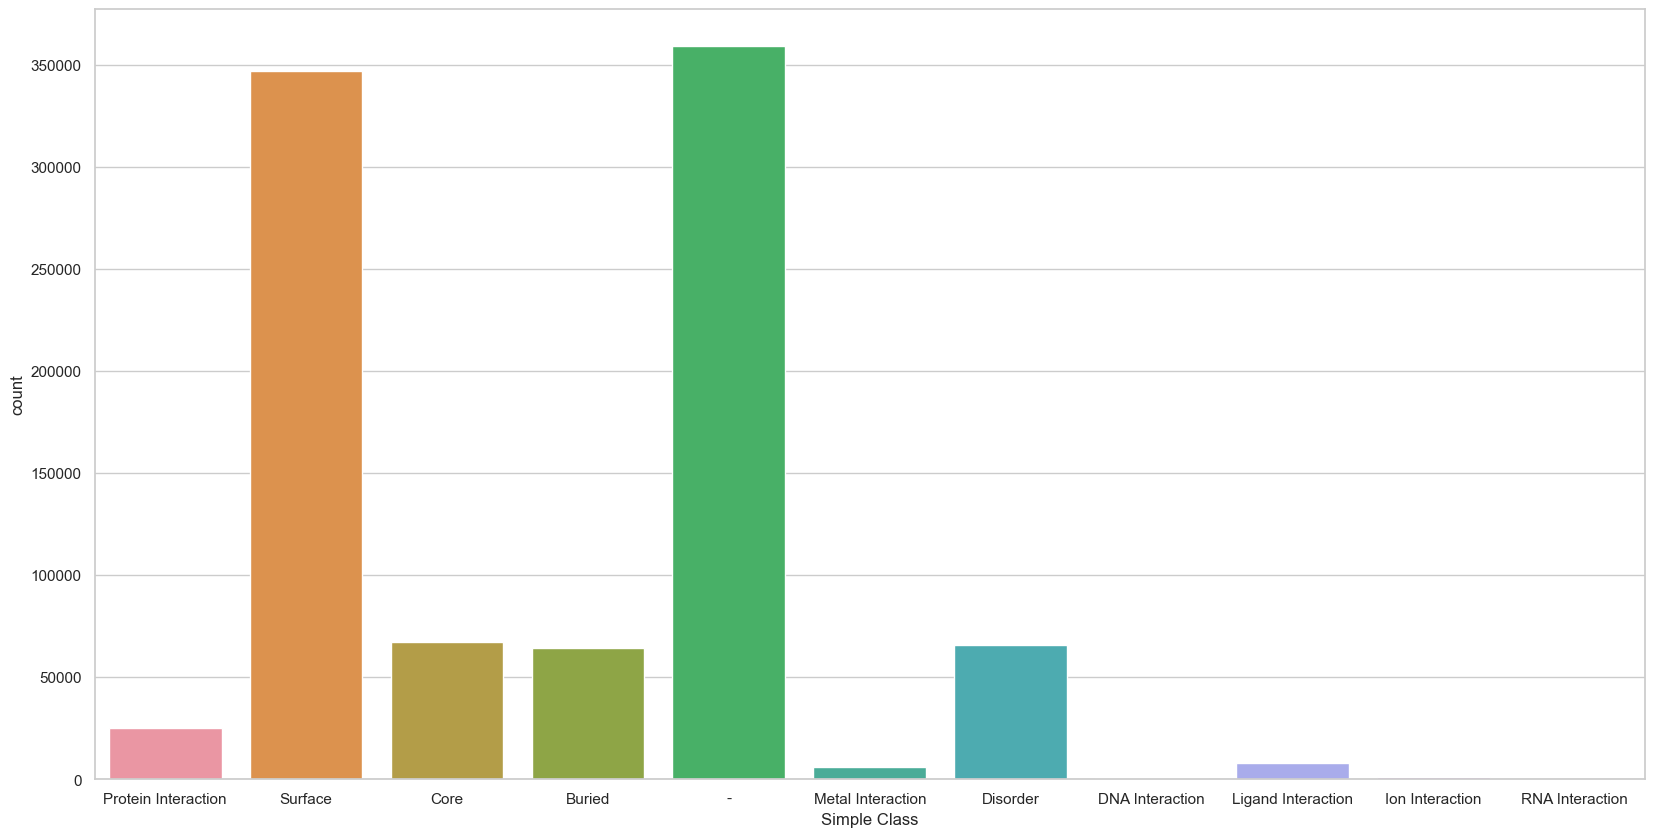

In [27]:
#the bars for the plot should go in the following order: 'Protein Interaction', 'Surface', 'Core', 'Buried', '-','Metal Interaction', 'Disorder', 'DNA Interaction', 'Ligand Interaction', 'Ion Interaction', 'RNA Interaction'
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="Simple Class", data=compare_df[compare_df['Primary Protein ID'].str.contains('_') == True], order=['Protein Interaction', 'Surface', 'Core', 'Buried', '-','Metal Interaction', 'Disorder', 'DNA Interaction', 'Ligand Interaction', 'Ion Interaction', 'RNA Interaction'])

